# Task # 2 - To Explore Supervised Machine Learning

In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.

Dataset: http://bit.ly/w-data

# LinearRegression 

Linear Regression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares 
between the observed targets in the dataset, and the targets predicted by the linear approximation.

Linear Regression Task Workflow:
    1. Import the libraries
    2. Import the dataset
    3. EDA
    4. Data preprocessing
    5. Train the model
    6. Precdict Test set results
    7. Model Performance    

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
#importing the data
data = pd.read_csv('Student_scores_Hours.csv')

In [3]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#Checking the Dataset dims
print(data.shape)
print(data.columns)

(25, 2)
Index(['Hours', 'Scores'], dtype='object')


In [5]:
#checking for any null values
data.isnull().any()

Hours     False
Scores    False
dtype: bool

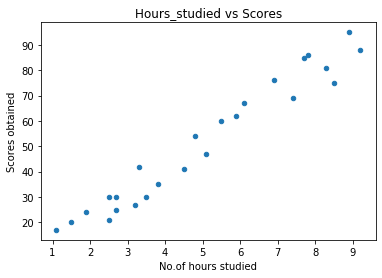

In [6]:
#Data Visualisation

data.plot(x ='Hours',y='Scores', kind='scatter')
plt.xlabel('No.of hours studied')
plt.ylabel('Scores obtained')
plt.title('Hours_studied vs Scores')

plt.show()

Inference:From the graph above,it can be ascertained that the number of hours studied and scores obtained are linearly related with a positive slope.

In [7]:
#feature vector
X = data.drop('Scores', axis = 1)

In [8]:
#target label
y = data['Scores'].values

In [9]:
X

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [10]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [11]:
#Splitting dataset into training and test set

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(20, 1) (20,)
(5, 1) (5,)


In [12]:
# Training the Model on training set
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
y_pred = regressor.predict(X_test)

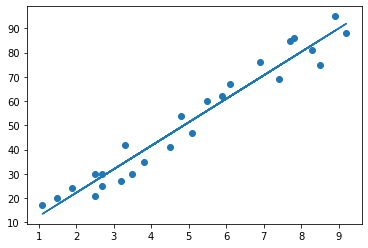

In [14]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [15]:
# Comparing the Test Set Actual vs Predicted values
test_df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})

In [16]:
test_df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [17]:
#performance of the model

In [18]:
regressor.score(X_test, Y_test)

0.9678055545167994

In [19]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, y_pred)
print("Mean squared error=",mse)

Mean squared error= 18.943211722315272


In [20]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, y_pred)
print("Mean absolute error=",mae)

Mean absolute error= 3.9207511902099244


---

# What will be predicted score if a student study for 9.25 hrs in a day?

In [21]:
#prediction for a student studying for 9.25 hours a day
hours = 9.25
pred_score = regressor.predict([[hours]])
print("No.of hours =",hours)
print("Predicted score =",pred_score[0])

No.of hours = 9.25
Predicted score = 92.38611528261494


---